In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Smart Grid/SuperGrid/super_grid_2021_22.csv")
df.head()

,Unnamed: 0,Date,GSP,SGT,Voltage_Min,Voltage_Max,Voltage_Avg,ActivePower_Min,ActivePower_Max,ActivePower_Avg,ReActivePower_Min,ReActivePower_Max,ReActivePower_Avg,Current_Min,Current_Max,Current_Avg
0,1020819,2021-01-25 23:30:00+00:00,BARKING WEST (LPN),SGT1A,33.33,33.33,33.33,19.60,20.14,19.69,2.0,2.48,2.08,338.00,341.89,338.21
1,1020822,2021-01-25 22:30:00+00:00,BARKING WEST (LPN),SGT1A,33.32,33.33,33.33,20.79,22.41,21.72,2.5,2.90,2.61,364.66,388.26,377.02
2,1020825,2021-01-25 21:00:00+00:00,BARKING WEST (LPN),SGT1A,32.91,32.91,32.91,23.80,25.01,24.48,3.6,4.40,4.00,431.00,442.12,432.68
3,1020828,2021-01-25 20:00:00+00:00,BARKING WEST (LPN),SGT1A,32.84,32.91,32.88,25.82,26.41,26.04,4.1,4.60,4.23,460.21,470.18,467.56
4,1020831,2021-01-25 17:30:00+00:00,BARKING WEST (LPN),SGT1A,32.80,32.80,32.80,26.02,26.65,26.28,3.7,4.62,4.10,459.98,472.53,467.53


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Date,0
GSP,0
SGT,0
Voltage_Min,0
Voltage_Max,0
Voltage_Avg,0
ActivePower_Min,0
ActivePower_Max,0
ActivePower_Avg,0


In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df=df.sort_values(by='Date')

In [ ]:
dfn=df[['Date','ActivePower_Avg']]
dfn.head(3)

,Date,ActivePower_Avg
31698,2021-01-01 00:30:00+00:00,19.11
12005,2021-01-01 01:00:00+00:00,18.53
402,2021-01-01 01:30:00+00:00,18.03


In [ ]:
dfn['Date'] = pd.to_datetime(dfn['Date'])
dfn['day'] = dfn['Date'].apply(lambda x : x.day)
dfn['month'] = dfn['Date'].apply(lambda x : x.month)
dfn['year'] = dfn['Date'].apply(lambda x : x.year)
dfn['hour'] = dfn['Date'].apply(lambda x : x.hour)
dfn['minute'] = dfn['Date'].apply(lambda x : x.minute)
dfn = dfn.set_index("Date")

<ipython-input-7-f324d73186e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['Date'] = pd.to_datetime(dfn['Date'])
<ipython-input-7-f324d73186e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['day'] = dfn['Date'].apply(lambda x : x.day)
<ipython-input-7-f324d73186e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
dfn.head()

,ActivePower_Avg,day,month,year,hour,minute
Date,,,,,,
2021-01-01 00:30:00+00:00,19.11,1,1,2021,0,30
2021-01-01 01:00:00+00:00,18.53,1,1,2021,1,0
2021-01-01 01:30:00+00:00,18.03,1,1,2021,1,30
2021-01-01 02:00:00+00:00,17.23,1,1,2021,2,0
2021-01-01 02:30:00+00:00,16.18,1,1,2021,2,30


In [ ]:
dfn = dfn[dfn.index <= "2022-03-15"]

In [ ]:
df.shape

(35039, 16)

In [ ]:
dfn.shape

(21024, 6)

In [ ]:
testdata = dfn[dfn.index >= "2022-03-01"]
#trainset = df.iloc[:,1]
trainset = dfn[(dfn.index >= "2021-08-01") & (dfn.index <= "2022-03-01")].iloc[:, 0]

In [ ]:
print('Training data shape: ',trainset.shape)
print('Test data shape: ',testdata.shape)

Training data shape:  (10177,)
Test data shape:  (673, 6)


In [ ]:
trainset

,ActivePower_Avg
Date,
2021-08-01 00:00:00+00:00,13.33
2021-08-01 00:30:00+00:00,13.05
2021-08-01 01:00:00+00:00,12.34
2021-08-01 01:30:00+00:00,11.98
2021-08-01 02:00:00+00:00,11.52
...,...
2022-02-28 22:00:00+00:00,19.92
2022-02-28 22:30:00+00:00,18.50
2022-02-28 23:00:00+00:00,17.17


In [ ]:
trainset=np.array(trainset).reshape(-1, 1)
print(trainset)

[[13.33]
 [13.05]
 [12.34]
 ...
 [17.17]
 [15.83]
 [15.95]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
train = sc.fit_transform(trainset)

In [ ]:
XTrain = []
YTrain = []

# first 96 values = 2 days
for i in range(96, train.shape[0]):

    # X_Train 0-96
    XTrain.append(train[i-96:i])

    # Y Would be 95 th Value based on past 94 Values just like done in transformer
    YTrain.append(train[i])

# Convert into Numpy Array
XTrain = np.array(XTrain)
YTrain = np.array(YTrain)

print(XTrain.shape)
print(YTrain.shape)

(10081, 96, 1)
(10081, 1)


In [ ]:
XTrain = np.reshape(XTrain, newshape=(XTrain.shape[0], XTrain.shape[1], 1))
XTrain.shape

(10081, 96, 1)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.utils import *
from keras.initializers import *

regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (XTrain.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 96, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 96, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 96, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 96, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 96, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 96, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
regressor.fit(XTrain, YTrain, epochs = 100, batch_size = 64)

Epoch 1/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0377
Epoch 2/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0069
Epoch 3/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0055
Epoch 4/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0048
Epoch 5/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0036
Epoch 6/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0033
Epoch 7/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0031
Epoch 8/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0028
Epoch 9/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0025
Epoch 10/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0023
Epoch 11/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0021
Epoch 12/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0020
Epoch 13/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0020
Epoch 14/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0018
Epoch 15/100
158/158 ━━━━━━━━

In [ ]:
testdata.head(3)

,ActivePower_Avg,day,month,year,hour,minute
Date,,,,,,
2022-03-01 00:00:00+00:00,15.95,1,3,2022,0,0
2022-03-01 00:30:00+00:00,16.30,1,3,2022,0,30
2022-03-01 01:00:00+00:00,16.53,1,3,2022,1,0


In [ ]:
testdata.shape

(673, 6)

In [ ]:
df_total = pd.concat((dfn[["ActivePower_Avg"]][:-673], testdata[["ActivePower_Avg"]]), axis=0)
df_total.shape

(21024, 1)

In [ ]:
inputs = df_total[len(df_total) - len(testdata) - 96:].values
inputs.shape

(769, 1)

In [ ]:
inputs = df_total[len(df_total) - len(testdata) - 96:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(96, 96+673):
    X_test.append(inputs[i-96:i])

print(X_test)
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model
pred = regressor.predict(X_test)

# Do inverse Transformation to get Values
pred = sc.inverse_transform(pred)

Streaming output truncated to the last 5000 lines.
       [0.31701531],
       [0.33383653],
       [0.34418805],
       [0.37179211],
       [0.38149666],
       [0.37934009],
       [0.36963554],
       [0.3569118 ],
       [0.35065775],
       [0.33901229],
       [0.33987492],
       [0.32262239],
       [0.30644813],
       [0.28100065],
       [0.29933146],
       [0.30256631],
       [0.29113651],
       [0.27927539],
       [0.26374811],
       [0.24843649],
       [0.23873194],
       [0.22622385],
       [0.21522536],
       [0.21048091],
       [0.21069657],
       [0.22342031],
       [0.22665516],
       [0.22277334],
       [0.2180289 ],
       [0.22342031],
       [0.23830063],
       [0.26676731],
       [0.28337287],
       [0.30386025],
       [0.31399612],
       [0.32175976],
       [0.30968298],
       [0.31313349],
       [0.33189562],
       [0.34548199],
       [0.35173604],
       [0.36057796],
       [0.36295018],
       [0.36014665],
       [0.35755877],
    

In [ ]:
true = testdata[["ActivePower_Avg"]].values

In [ ]:
#true = testdata["ActivePower_Avg"].to_list()
#prediction = [x[0] for x in prediction ]
dates = testdata.index.to_list()

In [ ]:
X_test.shape

(673, 96, 1)

In [ ]:
len(true), len(pred), len(dates)

(673, 673, 673)

In [ ]:
machinedf = pd.DataFrame(data={
    "Date":dates,
    "True": true.flatten(),
    "Prediction":pred.flatten()
})
title = {'family': 'serif', 'color':  'darkred', 'weight': 'bold', 'size': 15}

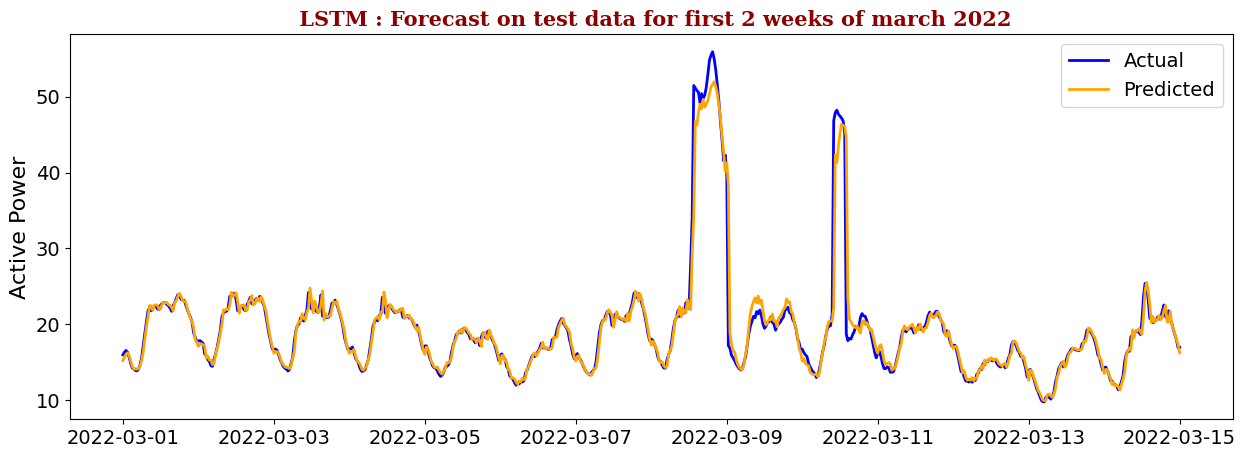

In [ ]:
plt.figure(figsize=(15, 5))
plt.title(" LSTM : Forecast on test data for first 2 weeks of march 2022", fontdict = title)
sns.lineplot(x = dates, y = true.flatten(),
             label='Actual', color = 'blue', linewidth = 2.,  markersize=5)

# Plot predicted values
sns.lineplot(x = dates, y = pred.flatten(),
             label='Predicted', color='orange', linewidth = 2., markersize=5)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel("Active Power", fontsize = 16)
plt.legend(fontsize='14')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

def evaluate_regression_metrics(y_true, y_pred):
    """
    Calculates and returns regression metrics.

    Args:
        y_true: The true values.
        y_pred: The predicted values.

    Returns:
        A dictionary containing the R-squared score, MSE, RMSE, and MAPE.
    """

    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    metrics = { "model" : ["LSTM"],
        "R-squared": [r2],
        "MSE": [mse],
        "RMSE": [rmse],
        "MAPE": [mape]
    }

    return pd.DataFrame(metrics)

evaluate_regression_metrics(true.flatten(), pred.flatten())

,model,R-squared,MSE,RMSE,MAPE
0,LSTM,0.926025,3.947237,1.986765,3.340155


In [ ]:
import json

with open("lstms.json", "w") as json_file:
    # Step 4: Write data to the file
    json.dump({"preds" : pred.flatten().tolist()}, json_file, indent=4)